<h1 style=”font-size:4rem;color:blue;text-align:center;”>Notebook 5</h1>


##### Libraries

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data

In [3]:
df = pd.read_csv("combined_data.csv")

In [5]:
df.head()

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year
0,10/11/2016,101.28,0.69,10.0,2016.0,4.0,42.0,3.0,2.0,285.0,0
1,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
2,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
3,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0
4,10/13/2016,101.30,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0


In [214]:
df["US_election"] = np.where(df["Year"].isin([2024, 2020, 2016]), 1, 0)

In [244]:
df.sample(8)

,Date,Mean-value,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election
458,8/10/2018,100.36,2.42,8.0,2018.0,3.0,32.0,2.0,5.0,222.0,0,0
176,6/28/2017,103.67,1.21,6.0,2017.0,2.0,26.0,5.0,3.0,179.0,1,0
1049,12/31/2020,109.17,0.10,12.0,2020.0,4.0,53.0,5.0,4.0,366.0,0,1
573,1/24/2019,101.41,2.58,1.0,2019.0,1.0,4.0,4.0,4.0,24.0,0,0
506,10/17/2018,100.97,2.66,10.0,2018.0,4.0,42.0,3.0,3.0,290.0,0,0
987,10/2/2020,108.49,0.12,10.0,2020.0,4.0,40.0,1.0,5.0,276.0,0,1
1252,10/22/2021,111.06,0.13,10.0,2021.0,4.0,43.0,4.0,5.0,295.0,0,0
442,7/19/2018,100.63,2.40,7.0,2018.0,3.0,29.0,3.0,4.0,200.0,0,0


In [218]:
df["US_election"].value_counts()

US_election
0    1456
1     546
Name: count, dtype: int64

In [17]:
df.isna().sum()

Date             0
Mean-value       0
Interest-rate    0
Month            0
Year             0
Quarter          0
Week-of-year     0
Week-of-month    0
Day-of-week      0
Day-of-year      0
election-year    0
dtype: int64

In [220]:
df = df.dropna()

In [222]:
df.shape

(2002, 12)

##### Load the data again to plot mean-value & Interest rate against Date

In [225]:
df2 = (pd.read_csv("combined_data.csv", index_col='Date', parse_dates=True)).dropna()

In [227]:
df2.shape

(2002, 10)

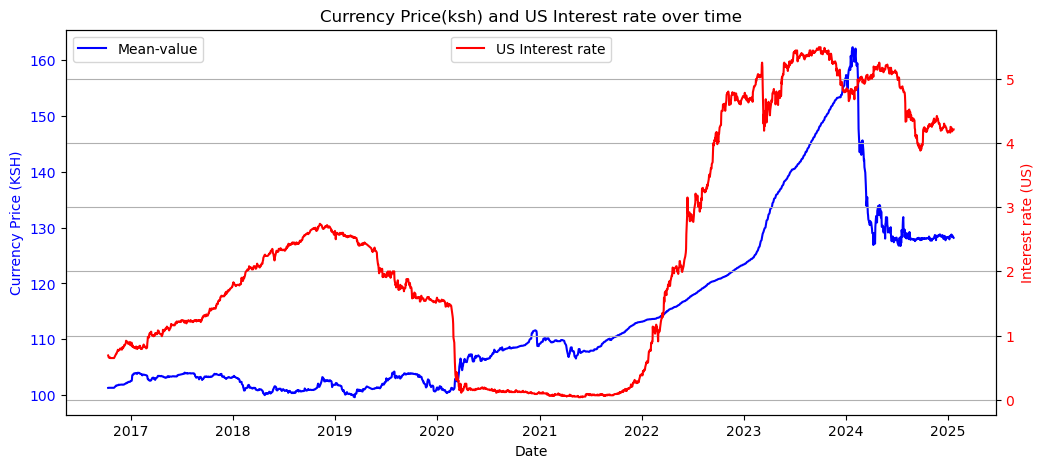

In [44]:
#Plotting

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(df2.index, df2['Mean-value'], label='Mean-value', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Currency Price (KSH)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Create a twin axis sharing the same x-axis
ax2.plot(df2.index, df2['Interest-rate'], label='US Interest rate', color='red')
ax2.set_ylabel('Interest rate (US)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Currency Price(ksh) and US Interest rate over time')
plt.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

plt.show()

There is a notable correlation between the Currency price and Interest rate

#### Train Test Split

##### Random train test split

In [229]:
from sklearn.model_selection import train_test_split

In [231]:
X = df.drop(columns = ["Date", "Mean-value", "Year"], axis=1)
y = df["Mean-value"]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [235]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1501, 9), (501, 9), (1501,), (501,))

In [291]:
X_train.head(2)

,Interest-rate,Month,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election
567,2.57,1.0,1.0,3.0,3.0,3.0,16.0,0,0
967,0.13,9.0,3.0,36.0,1.0,5.0,248.0,0,1


#### Modelling

In [237]:
#models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

In [239]:
models = {
    "Ridge" : Ridge(alpha=1.0),
    "Lasso" : Lasso(alpha=1.0),
    "Random Forest" : RandomForestRegressor(),
    "KNeighbors" : KNeighborsRegressor(),
    "SVM" : SVR(kernel = 'rbf', C=1.0, epsilon=0.1),
    "XGBoost" : XGBRegressor(),
    "ElasticNet" : ElasticNet(alpha=0.1, l1_ratio=0.7),
    "Gradient Boost Regressor" : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3),
    "AdaBoost" : AdaBoostRegressor(n_estimators=100, learning_rate=0.1),
    "lightgbm" : LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Neural Networks" : MLPRegressor(hidden_layer_sizes=(1000), max_iter=500)
        
}

##### Random train test split modelling

In [242]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")

Ridge: 0.627365408812846
Lasso: 0.5636812238187825
Random Forest: 0.9820232149817278
KNeighbors: 0.6978837272120704
SVM: -0.1016789859450078
XGBoost: 0.9799081981102695
ElasticNet: 0.6068577947351326


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e+04, tolerance: 3.389e+01
  model = cd_fast.enet_coordinate_descent(


Gradient Boost Regressor: 0.9591160424001172
AdaBoost: 0.9010652621319156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 9
[LightGBM] [Info] Start training from score 114.324549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

#### 1.1 Random Forest

In [246]:
rf = RandomForestRegressor()

In [248]:
rf_model = rf.fit(X_train, y_train)

In [250]:
preds = rf_model.predict(X_test)

In [252]:
rf_model.score(X_test, y_test)

0.9826466945712875

#### Save the model

In [289]:
import joblib
import os
# Save the best model to a file
joblib.dump(rf_model, "rf_model1.pkl")

['rf_model1.pkl']

In [254]:
y_test

1441    118.66
365     100.86
1378    115.54
936     107.88
1333    113.64
         ...  
1401    116.69
421     100.96
1669    140.44
718     103.82
1704    143.91
Name: Mean-value, Length: 501, dtype: float64

In [256]:
actual = pd.DataFrame(y_test)

In [258]:
actual['preds'] = preds

In [260]:
actual

,Mean-value,preds
1441,118.66,118.6904
365,100.86,101.0704
1378,115.54,115.5782
936,107.88,107.6154
1333,113.64,113.6376
...,...,...
1401,116.69,116.5240
421,100.96,101.0644
1669,140.44,140.4971
718,103.82,103.8058


In [262]:
actuals = actual.reset_index()

In [264]:
actuals

,index,Mean-value,preds
0,1441,118.66,118.6904
1,365,100.86,101.0704
2,1378,115.54,115.5782
3,936,107.88,107.6154
4,1333,113.64,113.6376
...,...,...,...
496,1401,116.69,116.5240
497,421,100.96,101.0644
498,1669,140.44,140.4971
499,718,103.82,103.8058


<Axes: >

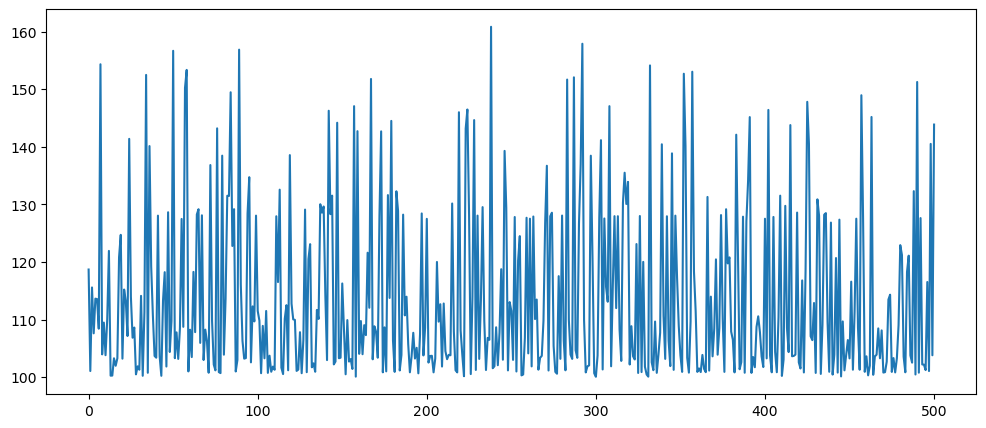

In [266]:
actuals['preds'].plot(figsize=(12,5))

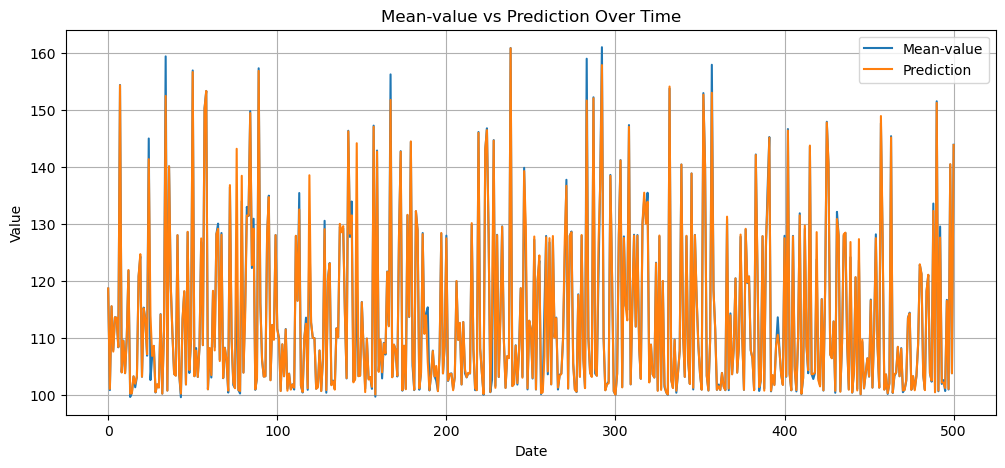

In [268]:
plt.figure(figsize=(12, 5))
plt.plot(actuals.index, actuals['Mean-value'], label='Mean-value')
plt.plot(actuals.index, actuals['preds'], label='Prediction')

# Add labels, title, and legend

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean-value vs Prediction Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### merging the data

In [271]:
df_merged2 = pd.merge(df, actual, left_index=True, right_index=True)

In [273]:
df_merged2

,Date,Mean-value_x,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election,Mean-value_y,preds
2,10/13/2016,101.30000,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0,1,101.30000,101.300000
24,11/23/2016,101.85000,0.80,11.0,2016.0,4.0,48.0,4.0,3.0,328.0,0,1,101.85000,101.850200
32,12/1/2016,101.85000,0.82,12.0,2016.0,4.0,49.0,1.0,4.0,336.0,0,1,101.85000,101.884700
33,12/2/2016,101.86000,0.80,12.0,2016.0,4.0,49.0,1.0,5.0,337.0,0,1,101.86000,101.892800
35,12/6/2016,101.87000,0.83,12.0,2016.0,4.0,50.0,2.0,2.0,341.0,0,1,101.87000,101.873000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,12/16/2024,127.96115,4.24,12.0,2024.0,4.0,51.0,3.0,1.0,351.0,0,1,127.96115,128.199452
2051,12/23/2024,127.73115,4.26,12.0,2024.0,4.0,52.0,4.0,1.0,358.0,0,1,127.73115,128.301145
2058,1/2/2025,128.22750,4.17,1.0,2025.0,1.0,1.0,1.0,4.0,2.0,0,0,128.22750,128.246751
2061,1/7/2025,128.41735,4.19,1.0,2025.0,1.0,2.0,2.0,2.0,7.0,0,0,128.41735,128.217425


In [275]:
df_merged2_index = df_merged2.set_index('Date')

In [277]:
df_merged2

,Date,Mean-value_x,Interest-rate,Month,Year,Quarter,Week-of-year,Week-of-month,Day-of-week,Day-of-year,election-year,US_election,Mean-value_y,preds
2,10/13/2016,101.30000,0.66,10.0,2016.0,4.0,42.0,3.0,4.0,287.0,0,1,101.30000,101.300000
24,11/23/2016,101.85000,0.80,11.0,2016.0,4.0,48.0,4.0,3.0,328.0,0,1,101.85000,101.850200
32,12/1/2016,101.85000,0.82,12.0,2016.0,4.0,49.0,1.0,4.0,336.0,0,1,101.85000,101.884700
33,12/2/2016,101.86000,0.80,12.0,2016.0,4.0,49.0,1.0,5.0,337.0,0,1,101.86000,101.892800
35,12/6/2016,101.87000,0.83,12.0,2016.0,4.0,50.0,2.0,2.0,341.0,0,1,101.87000,101.873000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,12/16/2024,127.96115,4.24,12.0,2024.0,4.0,51.0,3.0,1.0,351.0,0,1,127.96115,128.199452
2051,12/23/2024,127.73115,4.26,12.0,2024.0,4.0,52.0,4.0,1.0,358.0,0,1,127.73115,128.301145
2058,1/2/2025,128.22750,4.17,1.0,2025.0,1.0,1.0,1.0,4.0,2.0,0,0,128.22750,128.246751
2061,1/7/2025,128.41735,4.19,1.0,2025.0,1.0,2.0,2.0,2.0,7.0,0,0,128.41735,128.217425


#### Plotting the Prediction values and the Actual values

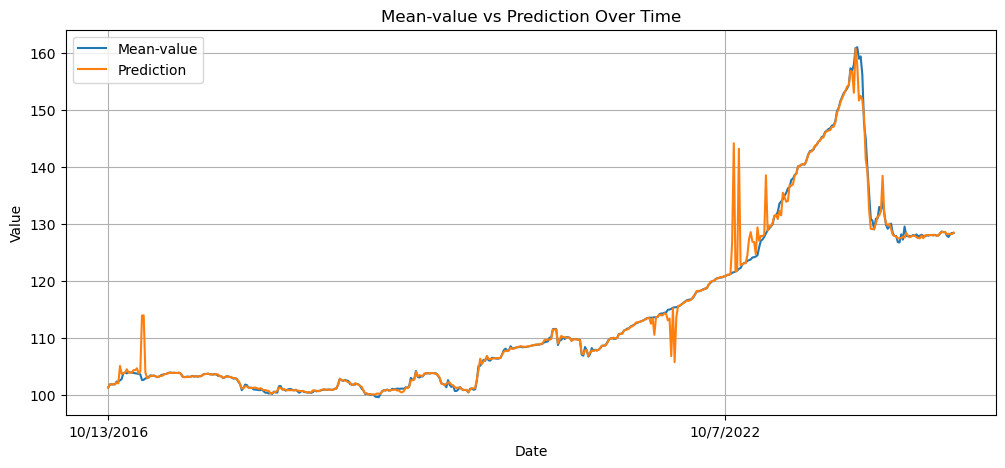

In [286]:
import matplotlib.dates as mdates

#Plot
plt.figure(figsize=(12, 5))
plt.plot(df_merged2_index.index, df_merged2_index['Mean-value_x'], label='Mean-value')
plt.plot(df_merged2_index.index, df_merged2_index['preds'], label='Prediction')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean-value vs Prediction Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [158]:
df_merged2.to_csv("df_merged2.csv", index=False)

#### 2.1 LightGBM

In [169]:
lgbm = LGBMRegressor(n_estimators=100, learning_rate=1, max_depth=3)

In [171]:
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 577
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 8
[LightGBM] [Info] Start training from score 114.324549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [173]:
lgbm_model.score(X_test, y_test)

0.9492370416329292

#### GridSearch CV

In [194]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [196]:
rf = RandomForestRegressor()

In [198]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [200]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [202]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 11.814940136057816


In [204]:
grid_search.score(X_test, y_test)

-11.602991794572379